In [10]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\usepackage{newtxmath}'] 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
from matplotlib import rc

from cycler import cycler


mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')
# sns.set_palette("Blues_r")

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999

/var/folders/8v/5czrtjp134z_qn6j_jsmrnl80000gn/T/ipykernel_13896/831503919.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\usepackage{newtxmath}']
/var/folders/8v/5czrtjp134z_qn6j_jsmrnl80000gn/T/ipykernel_13896/831503919.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-notebook')


In [11]:
# Change if required
folder = "../experiments/2022-11-14-16-33_BanditNonStaticAbrupt_"
dataset = "Abrupt"

In [12]:
masterdata = pd.read_csv("%s/BanditNonStaticAbrupt.csv"%folder, sep=",")
narms = masterdata.iloc[0]['k']

In [13]:
sorted(masterdata.bandit.unique())

['CustomOracle',
 'ImpCPD',
 'ImpCPD2',
 'ImpCPD3',
 'MP-ADR-Elimination-UCB-ADWIN1; d=0.001',
 'MP-ADR-Elimination-UCB-ADWIN1; d=0.01',
 'MP-ADR-Elimination-UCB-ADWIN1; d=0.1',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-12',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-15',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-4',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-5',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-6',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-7',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-8',
 'MP-ADS-KL-UCB-ADWIN1; d=0.001; r=false',
 'MP-ADS-KL-UCB-ADWIN1; d=0.001; r=true',
 'MP-ADS-KL-UCB-ADWIN1; d=0.01; r=false',
 'MP-ADS-KL-UCB-ADWIN1; d=0.01; r=true',
 'MP-ADS-KL-UCB-ADWIN1; d=0.1; r=false',
 'MP-ADS-KL-UCB-ADWIN1; d=0.1; r=true',
 'MP-ADS-KL-UCB-ADWIN1; d=1.0E-12; r=false',
 'MP-ADS-KL-UCB-ADWIN1; d=1.0E-12; r=true',
 'MP-ADS-KL-UCB-ADWIN1; d=1.0E-15; r=false',
 'MP-ADS-KL-UCB-ADWIN1; d=1.0E-15; r=true',
 'MP-ADS-KL-UCB-ADWIN1; d=1.0E-4; r=false',
 'MP-ADS-KL-UCB-ADWIN1; d=1.0E-4; r=true'

In [14]:
masterdata.columns

Index(['bandit', 'dataset', 'scalingstrategy', 'k', 'gain', 'cputime',
       'iteration'],
      dtype='object')

In [15]:
masterdata['reward/arm'] = masterdata['gain']/masterdata['k']

In [16]:
masterdata.shape

(960000, 8)

In [17]:
masterdata.groupby(["scalingstrategy", "bandit"])[['gain', 'k', 'reward/arm', 'cputime']].mean()

gain    k  \
scalingstrategy bandit                                                    
No-1            CustomOracle                              0.966554  1.0   
                ImpCPD                                    0.846339  1.0   
                ImpCPD2                                   0.800153  1.0   
                ImpCPD3                                   0.803882  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.001    0.682441  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.01     0.665817  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.1      0.618635  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-12  0.751892  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-15  0.752084  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-4   0.694798  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-5   0.725004  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-6   0.743257  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-7   0.751154  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-8   0.752665  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=0.001; r=false    0.902678  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=0.001; r=true     0.903494  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=0.01; r=false     0.903286  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=0.01; r=true      0.905097  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=0.1; r=false      0.911370  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=0.1; r=true       0.902695  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-12; r=false  0.901054  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-12; r=true   0.902548  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-15; r=false  0.900776  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-15; r=true   0.901909  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-4; r=false   0.903383  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-4; r=true    0.904922  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-5; r=false   0.901432  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-5; r=true    0.903314  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-6; r=false   0.902472  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-6; r=true    0.902608  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-7; r=false   0.903735  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-7; r=true    0.902987  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-8; r=false   0.900396  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-8; r=true    0.900858  1.0   
                MP-ADS-TS-ADWIN1; d=0.001; r=false        0.886011  1.0   
                MP-ADS-TS-ADWIN1; d=0.001; r=true         0.892454  1.0   
                MP-ADS-TS-ADWIN1; d=0.01; r=false         0.886241  1.0   
                MP-ADS-TS-ADWIN1; d=0.01; r=true          0.893118  1.0   
                MP-ADS-TS-ADWIN1; d=0.1; r=false          0.890980  1.0   
                MP-ADS-TS-ADWIN1; d=0.1; r=true           0.872261  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-12; r=false      0.884545  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-12; r=true       0.891338  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-15; r=false      0.882518  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-15; r=true       0.889662  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-4; r=false       0.885569  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-4; r=true        0.893525  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-5; r=false       0.885616  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-5; r=true        0.892231  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-6; r=false       0.885481  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-6; r=true        0.890309  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-7; r=false       0.883275  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-7; r=true        0.892879  1.0   
            

In [18]:
masterdata['dataset'].unique()

array(['AbruptGenerator-100'], dtype=object)

In [19]:
from matplotlib.markers import TICKLEFT, TICKRIGHT, TICKUP, TICKDOWN, CARETLEFT, CARETRIGHT, CARETUP, CARETDOWN
markers = [
#    '.',
#    ',',
    'v',
    'o',
    '^',
    '<',
    '>',
#    '1',
#    '2',
#    '3',
#    '4',
#    '8',
    's',
    'p',
    '*',
#    'h',
    'H',
    '+',
    'x',
    'D',
#    'd',
    '|',
    '_',
    TICKLEFT,
    TICKRIGHT,
    TICKUP,
    TICKDOWN,
    CARETLEFT,
    CARETRIGHT,
    CARETUP,
    CARETDOWN,
]
 

In [24]:
algs_ours = [    
    # ours
    'MP-ADR-Elimination-UCB-ADWIN1; d=0.001',
    'MP-ADS-TS-ADWIN1; d=0.001; r=true',
    'MP-ADS-KL-UCB-ADWIN1; d=0.001; r=true',
#    'MP-ADS-TS-ADWIN1; d=0.001; r=false'
]
algs_pass = [
    # passive
    'MP-D-UCB; g=0.9',
    'MP-RExp3; b=1000.0',
    'MP-SW-TS; w=1000',
#    'MP-SW-UCB; w=1000',
    'MP-SW-UCB#-A; nu=0.1; l=12.3', 
    #'MP-SW-UCB#-A; nu=0.2; l=12.3', 
    'MP-SW-UCB#-G; ka=0.1; l=4.3', 
    #'MP-SW-UCB#-G; ka=0.2; l=4.3'
]
algs_act = [
    # active
    'MP-GLR-KL-UCB-G',
#    'MP-GLR-KL-UCB-L',
#    'MP-GLR-KL-UCB-G-F',
#    'MP-GLR-KL-UCB-L-F',
    'MP-M-UCB; w=1000; m=10',
#    'MP-M-UCB; w=5000; m=100',
    #'ImpCPD',
    'ImpCPD2',
    #'ImpCPD3', 
    'UCBL-CPD'
]
algs_base = [
    # baselines
    'MP-TS',
    'MP-E-G; e=0.9',
    'OR',
    'OD',
    'OS',
    'CustomOracle'
]

In [25]:
prettynames = {
    'MP-ADR-Elimination-UCB-ADWIN1; d=0.001' : "ADR-E-UCB",
    'MP-ADS-TS-ADWIN1; d=0.001; r=true': "ADR-TS",
    'MP-ADS-TS-ADWIN1; d=0.001; r=false': "ADS-TS",
    'MP-ADS-KL-UCB-ADWIN1; d=0.001; r=true':'ADR-KL-UCB',
    'MP-D-UCB; g=0.9': "D-UCB",
    'MP-RExp3; b=1000.0': "RExp3",
    'MP-SW-TS; w=1000': "SW-TS",
    'MP-SW-UCB; w=1000': "SW-UCB",
    'MP-SW-UCB#-A; nu=0.1; l=12.3': "SW-UCB\#-A",
    'MP-SW-UCB#-G; ka=0.1; l=4.3': "SW-UCB\#-G",
    # active
    'MP-GLR-KL-UCB-G': 'GLR-KL-UCB',
    'MP-GLR-KL-UCB-L': 'GLR-KL-UCB-L',
    'MP-GLR-KL-UCB-G-F': 'GLR-KL-UCB-G-F',
    'MP-GLR-KL-UCB-L-F': 'GLR-KL-UCB-L-F',
#    'MP-M-UCB; w=1000; m=10': 'M-UCB; w=1000; m=10',
#    'MP-M-UCB; w=5000; m=100': 'M-UCB; w=5000; m=100',
    'MP-M-UCB; w=1000; m=10': 'M-UCB',
    'ImpCPD': 'ImpCPD1',
    'ImpCPD2': 'ImpCPD',
    'ImpCPD3': 'ImpCPD3', 
    'UCBL-CPD': 'UCBL-CPD',
    # baselines
    'MP-TS': 'MP-TS',
    'MP-E-G; e=0.9': 'Espilon-Greedy',
    'OR': "Random Oracle",
    'OD': "Dynamic Oracle",
    'OS': "Static Oracle",
    'CustomOracle': "Custom Oracle"
}

In [26]:
# compute regret against 'OD', or just the cumulative rewards

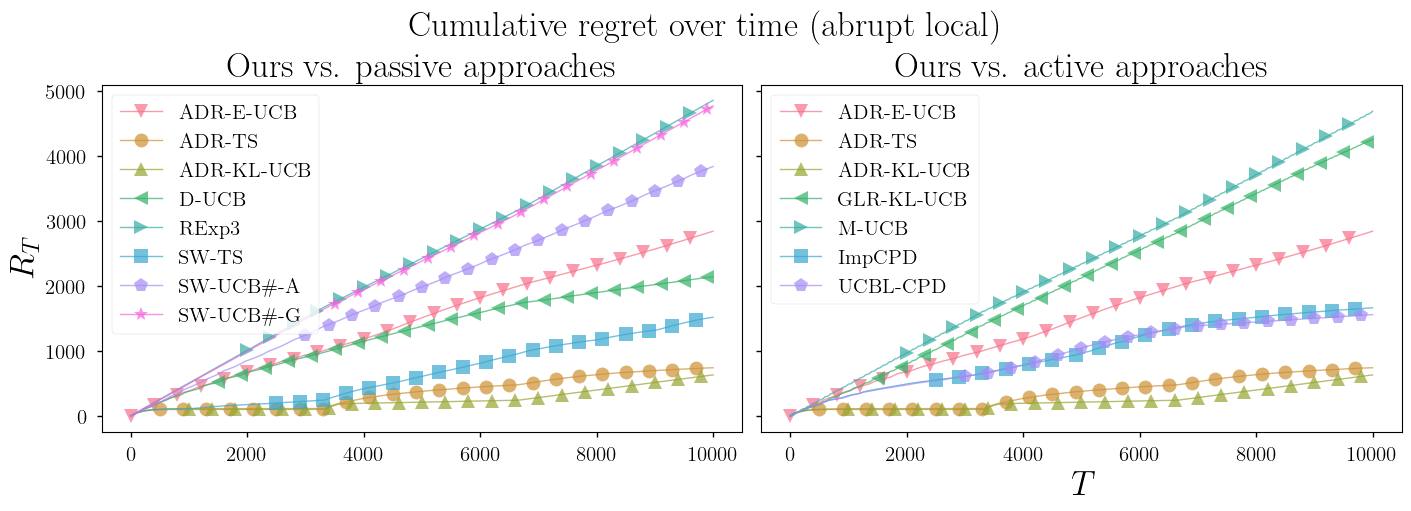

In [27]:
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(14,5), constrained_layout=True)

L = 1

plt.sca(axes[0])

i = 0
subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]
oracle = subdata[subdata["bandit"] == "CustomOracle"].gain.cumsum().reset_index(drop=True)
for bandit in algs_ours + algs_pass:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    ((oracle-cumsum)/L).plot(label=prettynames[bandit],linewidth=1, alpha=0.7,
                             markevery=(i*500,400),  marker=markers[i] , markersize=10)
    i+=1

plt.ylabel("$R_T$")
plt.legend(ncol=1, loc="upper left")
#plt.ylim([0,2000])
plt.title("Ours vs. passive approaches")

plt.sca(axes[1])

i = 0
subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]
oracle = subdata[subdata["bandit"] == "CustomOracle"].gain.cumsum().reset_index(drop=True)
for bandit in algs_ours + algs_act:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    ((oracle-cumsum)/L).plot(label=prettynames[bandit],linewidth=1, alpha=0.7,
                             markevery=(i*500,400),  marker=markers[i] , markersize=10)
    i+=1

plt.legend(ncol=1, loc="upper left")
plt.title("Ours vs. active approaches")
plt.xlabel("$T$")
#plt.ylim([0,2000])

#plt.tight_layout()

plt.suptitle("Cumulative regret over time (abrupt local)", fontsize=25)
plt.savefig("plots/%s_regret_Fig6.pdf"%dataset)